In [29]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial.distance import cdist

In [33]:
def rbf_kernel(A, B, s=5):
    # matrix of pairwise distances
    dists = cdist(A,B, 'sqeuclidean')
    return np.exp(-0.5*(dists/s**2))

colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k', 'w']

[0, 20, -2, 2]

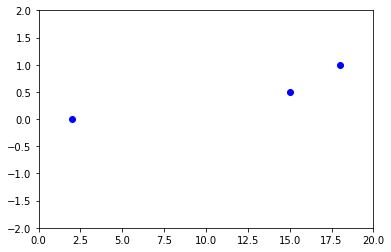

In [34]:
X2 = np.linspace(0,20,21).reshape(-1,1)
X1 = np.array([2,15,18,]).reshape(-1,1)
y1 = np.array([0,.5,1]).reshape(-1,1)

plt.plot(X1,y1,'bo')
plt.axis([0,20,-2,2])

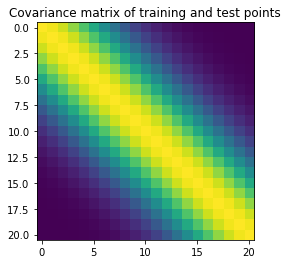

In [36]:
covX = rbf_kernel(X2, X2)
plt.imshow(covX)
plt.title('Covariance matrix of training and test points')
meanX = np.zeros(X2.shape[0])

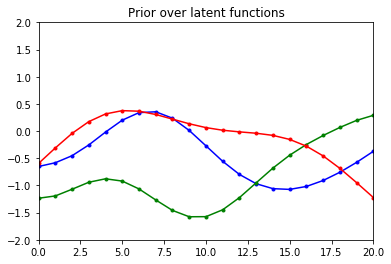

In [27]:
samples = np.random.multivariate_normal(meanX, covX, 3)
[plt.plot(s, colors[i]+'.-', ) for i,s in enumerate(samples)]
plt.axis([0,20,-2,2])
plt.title('Prior over latent functions'); None

In [20]:
Σ11 = rbf_kernel(X1,X1)
Σ12 = rbf_kernel(X1,X2)
Σ21 = Σ12.T
Σ22 = rbf_kernel(X2,X2)

post_mean = np.matmul(np.matmul(Σ21,np.linalg.inv(Σ11)), y1).reshape(-1)
post_cov = Σ22 - np.matmul(np.matmul(Σ21 , np.linalg.inv(Σ11)), Σ12)

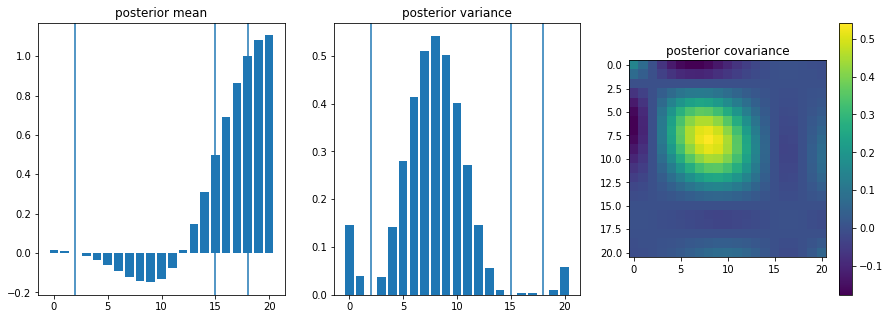

In [10]:
fig, ax = plt.subplots(1,3, figsize=(15,5))
ax[0].bar(np.arange(len(X2)), post_mean)
ax[1].bar(np.arange(len(X2)), np.diagonal(post_cov))
[ax[0].axvline(x=x) and ax[1].axvline(x=x) for x in X1]
im = ax[2].imshow(post_cov)
plt.colorbar(im, ax=ax[2])
ax[0].set_title('posterior mean')
ax[1].set_title('posterior variance')
ax[2].set_title('posterior covariance'); None

Text(0.5, 1.0, 'Posterior over latent functions')

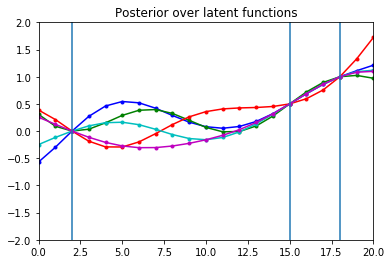

In [28]:
samples = np.random.multivariate_normal(post_mean, post_cov, 5)
[plt.plot(s, colors[i]+'.-', ) for i,s in enumerate(samples)]
[plt.axvline(x=x) for x in X1]
plt.axis([0,20,-2,2])
plt.title('Posterior over latent functions')